In [1]:
%load_ext autoreload
%autoreload 2

In [34]:

import os
import sys
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# where WellClass located
sys.path.append('../')

In [36]:
# WellClass
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)
from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting.plot_sketch import plot_sketch
from src.WellClass.libs.plotting.plot_pressure import plot_pressure
from src.WellClass.libs.plotting.plot_pt import plot_pt

# Load well CSV or yaml file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [45]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

root_path = '../test_data/examples/wildcat'
pvt_path = '../src/WellClass/libs/pvt/pvt_constants/pure_co2'


In [46]:
os.getcwd()

'/workspaces/WINC_OnePager/notebooks'

In [47]:
use_yaml = False

In [48]:
if use_yaml:
    well_case_yaml = r'Simple_well.yaml'
else:
    well_case_csv = r'Simple_well.csv'
    well_case_csv = r'GaP_input_Wildcat_v3.csv'
    # well_case_csv = r'GaP_input_Smeaheia_v3.csv'

In [49]:
# load the well information
if use_yaml:

    well_name = os.path.join(root_path, well_case_yaml)

    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    well_name = os.path.join(root_path, well_case_csv)
    well_csv = csv_parser(well_name)

In [50]:
!ls -l $well_name

-rwxrwxrwx 1 vscode root 1407 Aug 30 12:44 ../test_data/examples/wildcat/GaP_input_Wildcat_v3.csv


In [51]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
                geology      = well_csv['geology'],
           )

In [52]:
# pressure
my_pressure = Pressure( header       = well_csv['well_header'], 
                        reservoir_P  = well_csv['reservoir_pressure'],
                        co2_datum    = well_csv['co2_datum'],
                        pvt_path     = pvt_path
)

Computing pressures for pure CO2 (100% CO2)
Hydrostatic pressure at reference depth 2238 is 224.24
RP1 set as hydrostatic P = 224.24 bar
RP2 is set as delta pressure, which yields P = 224.24 +20.00 = 244.24 bar
Pressure scenario RP1: Compute pressures assuming reservoir pressure is 224.24 bar at 2238.00 mTVDMSL
Pressure scenario RP2: Compute pressures assuming reservoir pressure is 244.24 bar at 2238.00 mTVDMSL


# Visualization

[2638.0, 2370]


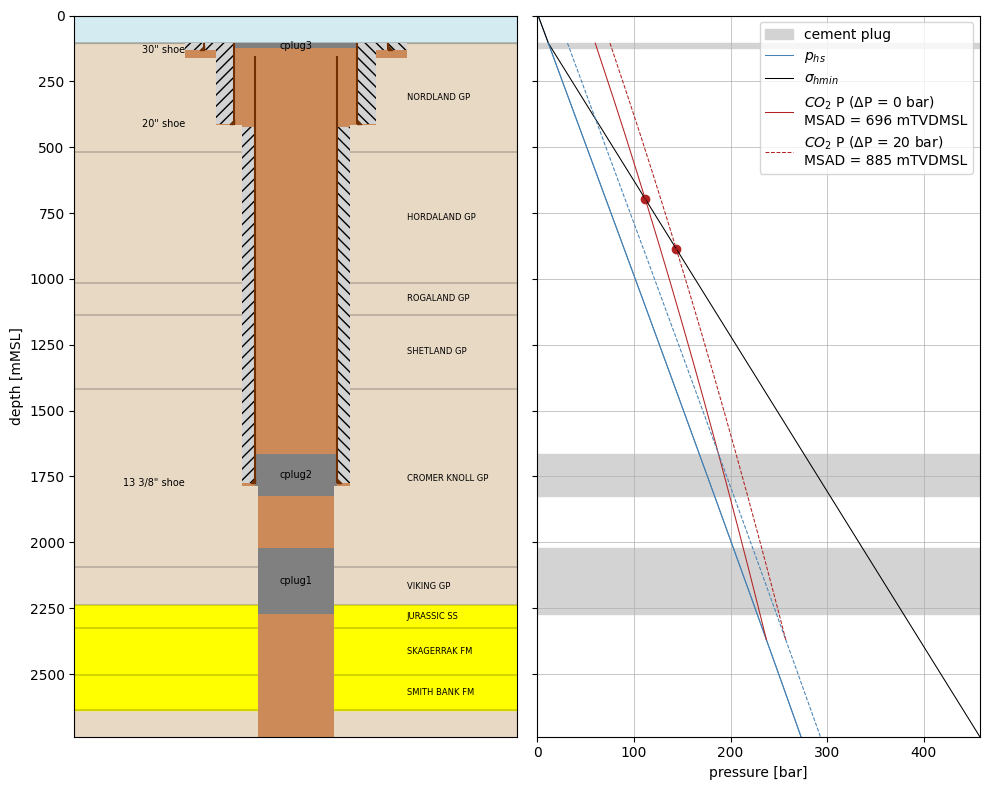

In [53]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2)

fig.tight_layout()

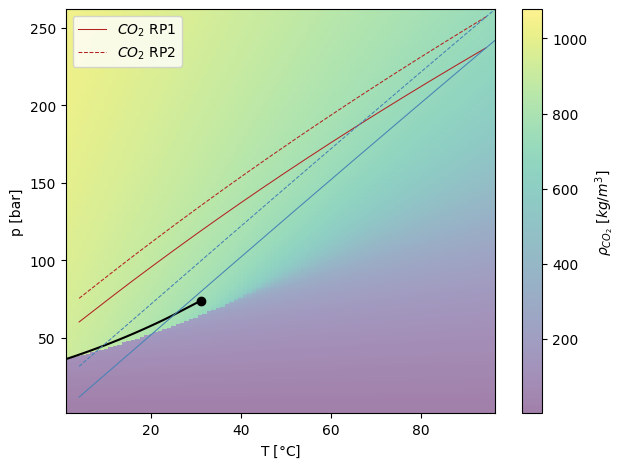

In [54]:
plot_pt(my_pressure)

# CO2 Leakage

In [50]:
print(json.dumps(my_well.barrier_perm, indent=2))

{
  "quality": {
    "0": "good",
    "1": "mid",
    "2": "poor"
  },
  "kv": {
    "0": 0.01,
    "1": 10.0,
    "2": 1000.0
  }
}


In [51]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

'cplug1'

In [52]:
# compute its leakage
barrier_leakage = my_pressure.compute_barrier_leakage(my_well, main_barrier)
barrier_leakage

barrier_perm:  {0: 0.01, 1: 10.0, 2: 1000.0}


,0.01,10.00,1000.00
RP1,0,0.00908,0.91958
RP2,0,0.01412,1.42342
